In [1]:
import numpy as np
Y_train = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Y_train.txt')
accX = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt')
accY = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt')
accZ = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt')
linearX = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt')
linearY = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt')
linearZ = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt')
gyroX = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt')
gyroY = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt')
gyroZ = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt')
gravityX = accX - linearX
gravityY = accY - linearY
gravityZ = accZ - linearZ

In [2]:
activty_labels  = '''
1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING

'''

In [3]:
walking_up_index = np.argwhere(Y_train == 2)
walking_down_index = np.argwhere(Y_train == 3)
s_l_i = np.vstack((walking_up_index, walking_down_index))[:,0]

In [4]:
accX = accX[s_l_i,:]
accY = accY[s_l_i,:]
accZ = accZ[s_l_i, :]
linearX = linearX[s_l_i, :]
linearY = linearY[s_l_i, :]
linearZ = linearZ[s_l_i, :]
gravityX = gravityX[s_l_i, :]
gravityZ = gravityZ[s_l_i, :]
gravityY = gravityY[s_l_i, :]
Y_train_s_l = Y_train[s_l_i]

In [256]:
import math
def roll_pitch(accX, accY, accZ):
    roll = []
    pitch = []
    for i in range(accX.shape[0]):
        roll.append(math.degrees(math.atan(accY[i]/accZ[i])))
        pitch.append(math.degrees(math.atan((- accX[i]) / (math.sqrt(accY[i] * accY[i] + accZ[i] * accZ[i])))))
    return np.mean(roll), np.mean(pitch)


num_features = 20
features_data = np.zeros(shape=(linearY.shape[0],num_features))
for i in range(gravityX.shape[0]):
    m_gx = np.mean(gravityX[i,:])
    m_gy = np.mean(gravityY[i,:])
    m_gz = np.mean(gravityZ[i,:])
    s_gy_x = np.sum(gyroX[i,:])
    s_gy_y = np.sum(gyroY[i,:])
    s_gy_z = np.sum(gyroZ[i,:])
    m_lx = np.mean(linearX[i,0])
    m_ly = np.mean(linearY[i,0])
    m_lz = np.mean(linearZ[i,0])
    roll_mean, pitch_mean = roll_pitch(gravityX[i,:], gravityY[i,:], gravityZ[i,:])
    m_t_ax = np.mean(accX[i,0])
    m_t_ay = np.mean(accY[i,0])
    m_t_az = np.mean(accZ[i,0])
    std_gx = np.std(gravityX[i,:])
    std_gy = np.std(gravityY[i,:])
    std_gz = np.std(gravityZ[i,:])
    std_lx = np.std(linearX[i,:])
    std_ly = np.std(linearY[i,:])
    std_lz = np.std(linearZ[i,:])
    
    features_data[i,:] = [m_gx, m_gy, m_gz,s_gy_x, s_gy_y, s_gy_z, m_lx, m_ly, m_lz, roll_mean, pitch_mean, m_t_ax, m_t_ay, m_t_az,
                          std_gx,std_gy,std_gz, std_lx, std_ly, std_lz]

In [59]:
from sklearn.model_selection import train_test_split
random_indexs = np.random.permutation(accX.shape[0])
_, X_plot, _, y_plot = train_test_split(features_data[random_indexs,:], Y_train_s_l[random_indexs], test_size=0.2)

In [60]:
import pandas as pd
features_df = pd.DataFrame(X_plot)
features_df.columns = ["mean_gravityX", "mean_gravityY", "mean_gravityZ", "sum_gyroX", "sum_gyroY", "sum_gyroZ",
                       "linear_mean_X", "linear_mean_y", "linear_mean_z", "roll_mean", "pitch_mean","total_body_accX", "total_body_accY",
                      "total_body_accZ","stdGravityX","stdGravityY","stdGravityZ","stdLinAccX","stdLinAccY","stdLinAccZ"]
labels_df = pd.DataFrame(y_plot)
labels_df.columns = ["label"]

f_features_df = features_df.join(labels_df)
f_features_df.head()

,mean_gravityX,mean_gravityY,mean_gravityZ,sum_gyroX,sum_gyroY,sum_gyroZ,linear_mean_X,linear_mean_y,linear_mean_z,roll_mean,...,total_body_accX,total_body_accY,total_body_accZ,stdGravityX,stdGravityY,stdGravityZ,stdLinAccX,stdLinAccY,stdLinAccZ,label
0,0.941063,-0.343717,-0.194954,-13.071420,3.825281,6.429860,0.222762,-0.046683,-0.228955,60.471776,...,1.166961,-0.402048,-0.410118,0.007027,0.005459,0.014699,0.323424,0.185568,0.166677,2.0
1,0.930529,-0.234793,-0.358559,-0.436556,-6.783172,16.339337,-0.054044,0.002957,-0.129406,33.193553,...,0.843957,-0.220382,-0.516025,0.013221,0.016457,0.008091,0.255282,0.179963,0.204118,2.0
2,1.009465,-0.094253,-0.070057,-12.936403,5.484574,-1.510947,-0.221090,0.078283,0.173164,52.638254,...,0.794346,-0.017503,0.061988,0.006357,0.025335,0.017154,0.322733,0.189430,0.226525,3.0
3,0.991739,-0.230825,-0.033792,-0.221291,1.291408,-0.498968,0.106747,0.215455,-0.156715,73.141089,...,1.083530,-0.057128,-0.173061,0.008255,0.021443,0.026455,0.189891,0.145576,0.170873,2.0
4,0.939543,-0.213110,-0.334526,0.208601,0.396347,-0.116850,0.345631,-0.499414,0.042700,32.590674,...,1.290127,-0.699702,-0.280560,0.013491,0.010158,0.030272,0.233656,0.205908,0.233316,2.0


In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
features_data_ft = MinMaxScaler().fit_transform(features_data)
features_df = pd.DataFrame(features_data)
features_df.columns = ["mean_gravityX", "mean_gravityY", "mean_gravityZ", "sum_gyroX", "sum_gyroY", "sum_gyroZ",
                       "linear_mean_X", "linear_mean_y", "linear_mean_z", "roll_mean", "pitch_mean","total_body_accX", "total_body_accY",
                      "total_body_accZ", "stdGravityX","stdGravityY","stdGravityZ","stdLinAccX","stdLinAccY","stdLinAccZ"]
labels_df = pd.DataFrame(Y_train_s_l)
labels_df.columns = ["label"]

f_features_df_entire = features_df.join(labels_df)
f_features_df_entire.head()

,mean_gravityX,mean_gravityY,mean_gravityZ,sum_gyroX,sum_gyroY,sum_gyroZ,linear_mean_X,linear_mean_y,linear_mean_z,roll_mean,...,total_body_accX,total_body_accY,total_body_accZ,stdGravityX,stdGravityY,stdGravityZ,stdLinAccX,stdLinAccY,stdLinAccZ,label
0,1.000033,-0.262586,-0.082403,2.848045,2.483554,1.211924,-0.088820,-0.052604,0.108979,72.221572,...,0.925337,-0.282266,-0.001156,0.018582,0.025927,0.027124,0.206105,0.155015,0.185828,2.0
1,0.977738,-0.297939,-0.066929,1.526497,-0.552159,0.807369,-0.035269,0.019561,0.080405,77.343848,...,0.959934,-0.248248,0.024573,0.008821,0.015305,0.007742,0.208850,0.150769,0.163720,2.0
2,0.974550,-0.310311,-0.074073,-0.531141,-1.617923,0.554850,0.196241,0.061817,-0.078770,76.570017,...,1.164581,-0.241330,-0.143931,0.004116,0.003884,0.008561,0.207674,0.172096,0.162167,2.0
3,0.981300,-0.306910,-0.074393,-2.077232,-0.985154,-0.045043,0.078186,0.069860,-0.060694,76.386211,...,1.050608,-0.242867,-0.126700,0.007336,0.005405,0.011304,0.205897,0.188166,0.178697,2.0
4,0.986124,-0.304814,-0.058325,-0.829770,-0.021304,-0.506508,0.218249,-0.257629,-0.213904,79.189944,...,1.187228,-0.571737,-0.280973,0.007378,0.004397,0.018582,0.216545,0.168409,0.187738,2.0


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

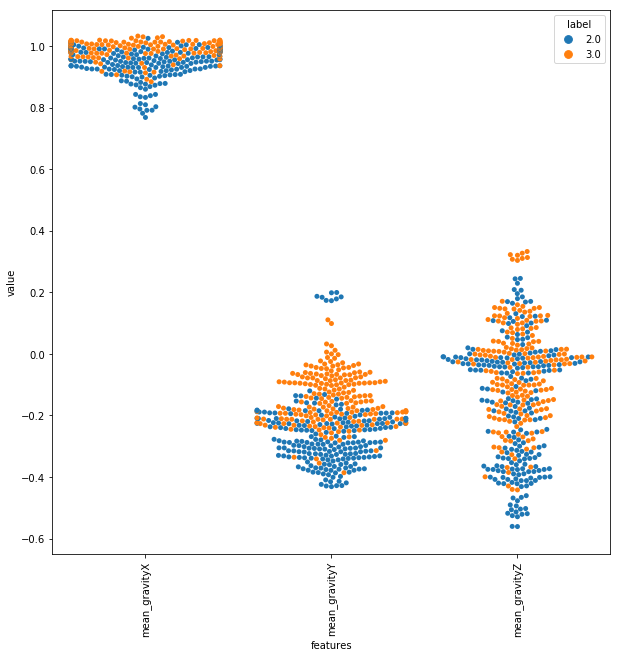

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

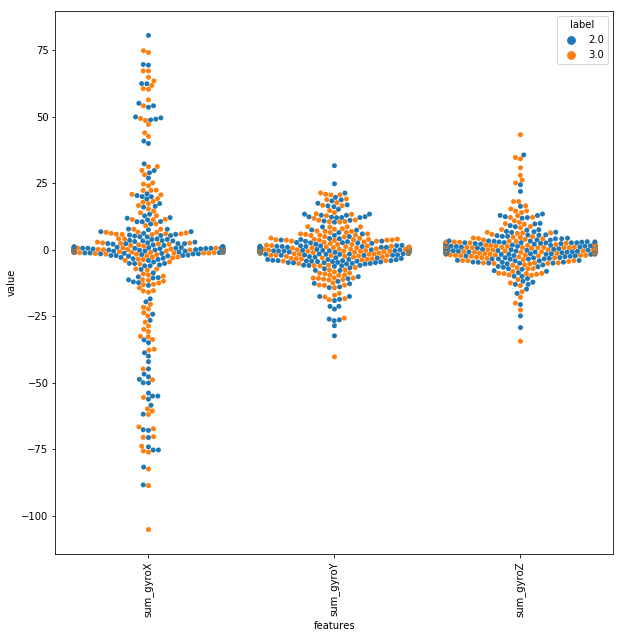

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df.iloc[:, [3,4,5,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="label", data=test)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

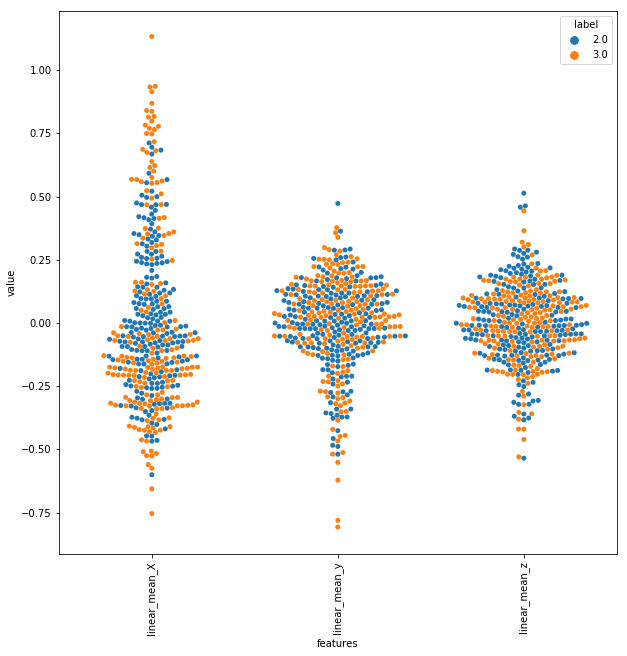

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df.iloc[:, [6,7,8,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="label", data=test)
plt.xticks(rotation=90)

(array([0]), <a list of 1 Text xticklabel objects>)

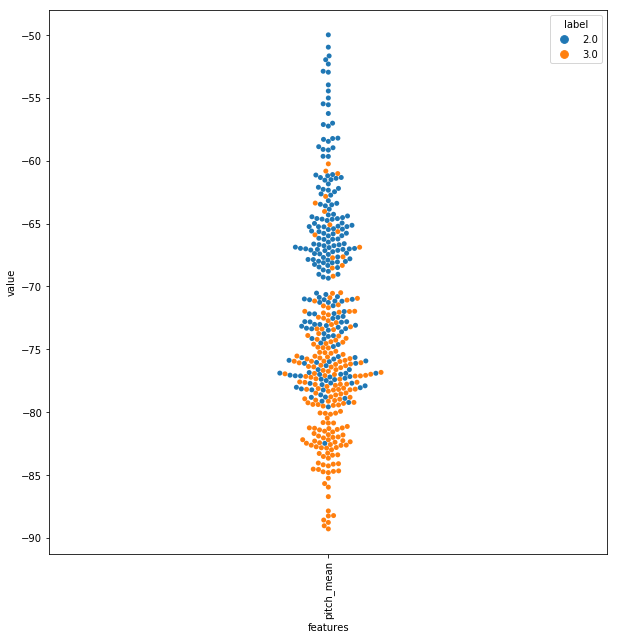

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df.iloc[:, [10,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="label", data=test)
plt.xticks(rotation=90)

(array([0]), <a list of 1 Text xticklabel objects>)

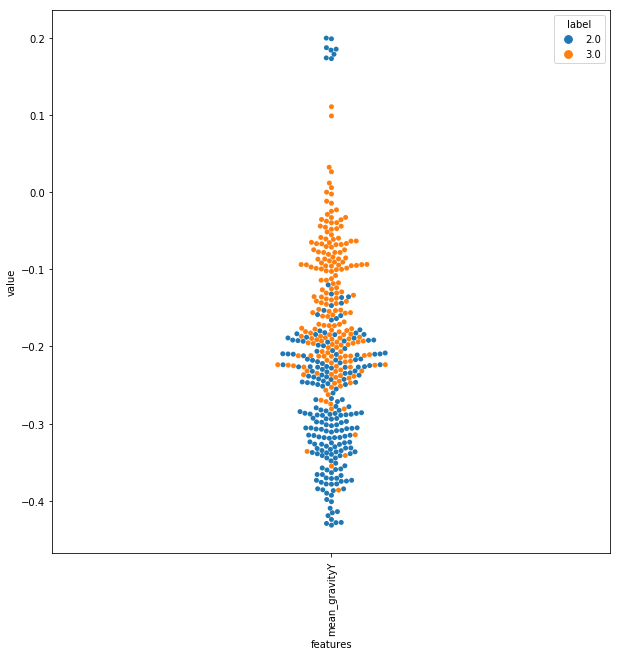

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df.iloc[:, [1,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="label", data=test)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

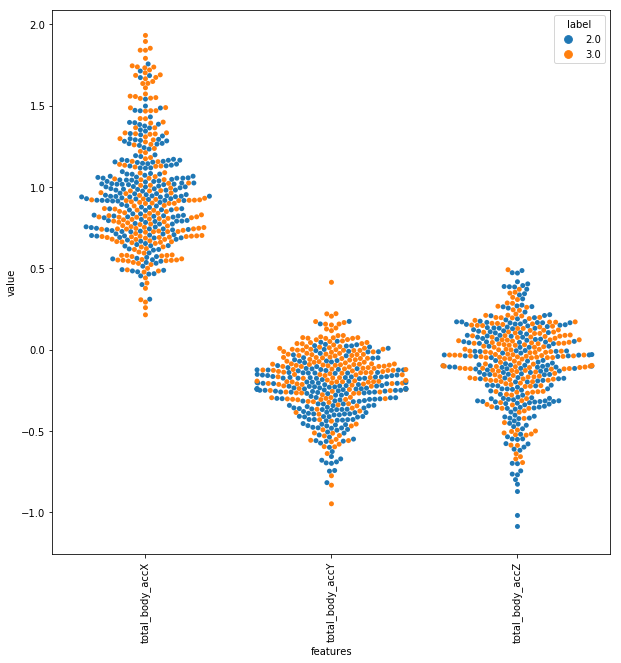

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df.iloc[:, [11,12,13,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="label", data=test)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

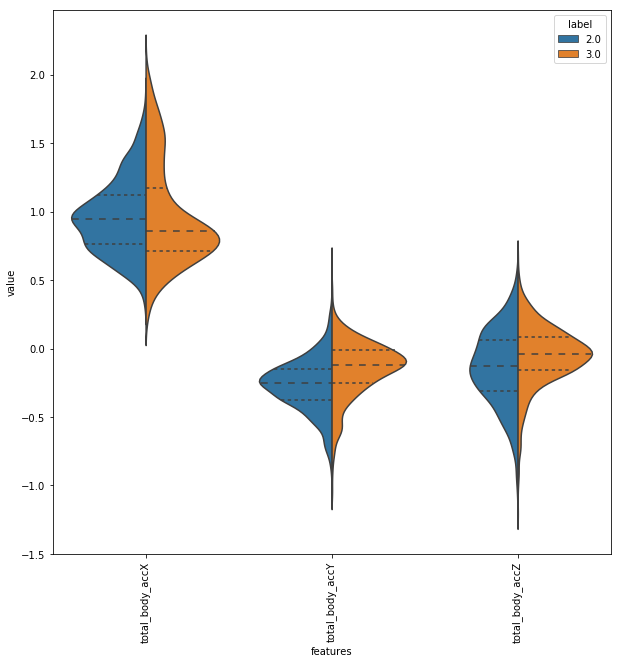

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df_entire.iloc[:, [11,12,13,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.violinplot(x="features", y="value", hue="label", data=test,split=True, inner="quart")
plt.xticks(rotation=90)


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

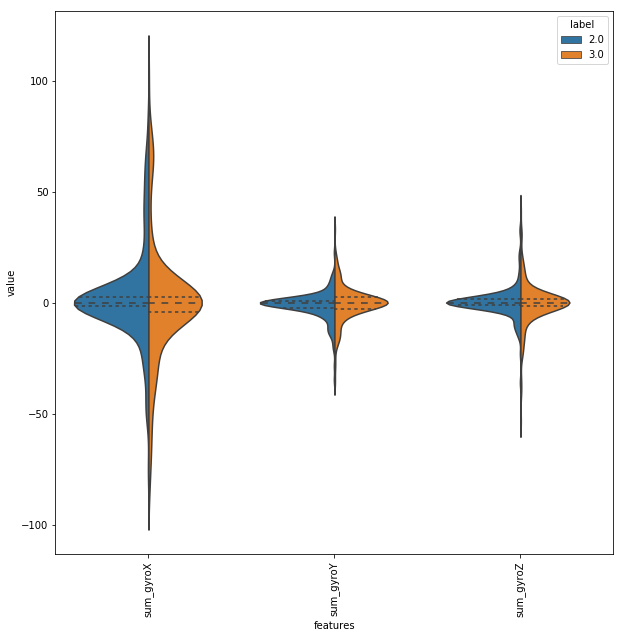

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df.iloc[:, [3,4,5,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.violinplot(x="features", y="value", hue="label", data=test,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

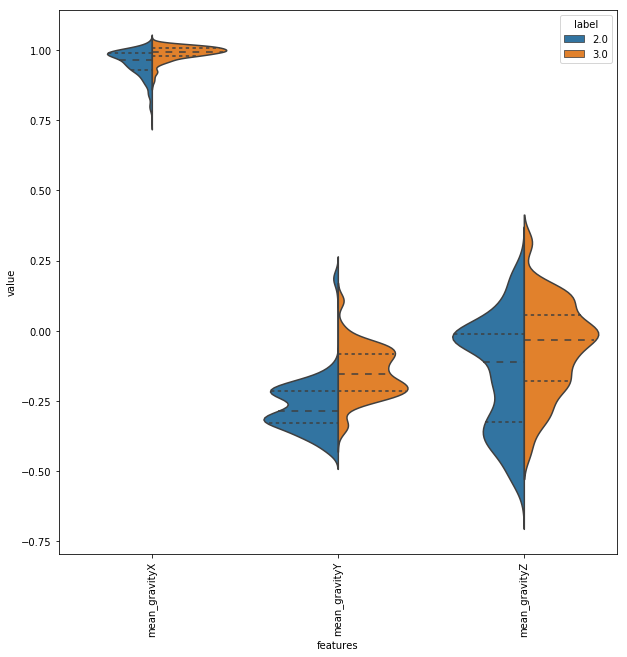

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df_entire.iloc[:, [0,1,2,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.violinplot(x="features", y="value", hue="label", data=test,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0]), <a list of 1 Text xticklabel objects>)

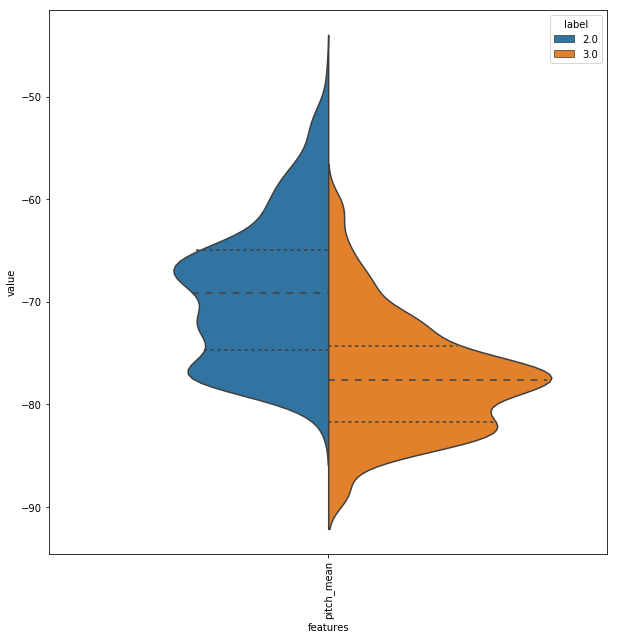

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df_entire.iloc[:, [10,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.violinplot(x="features", y="value", hue="label", data=test,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

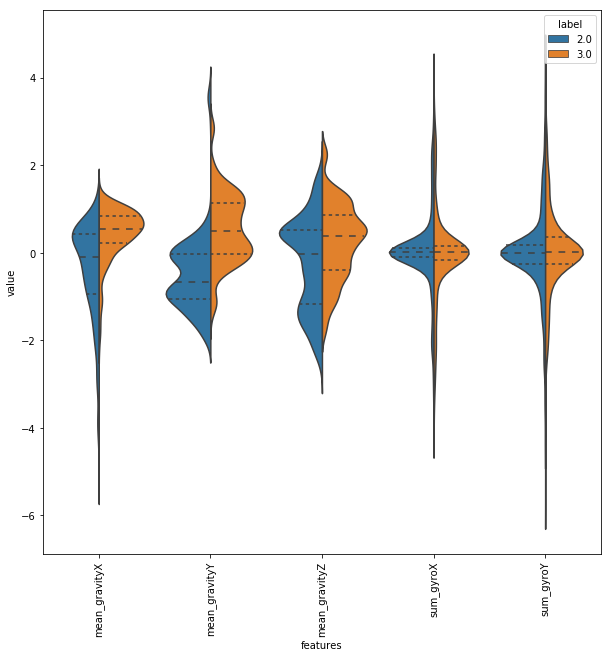

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df_entire.iloc[:, [0,1,2,3,4,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.violinplot(x="features", y="value", hue="label", data=test,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

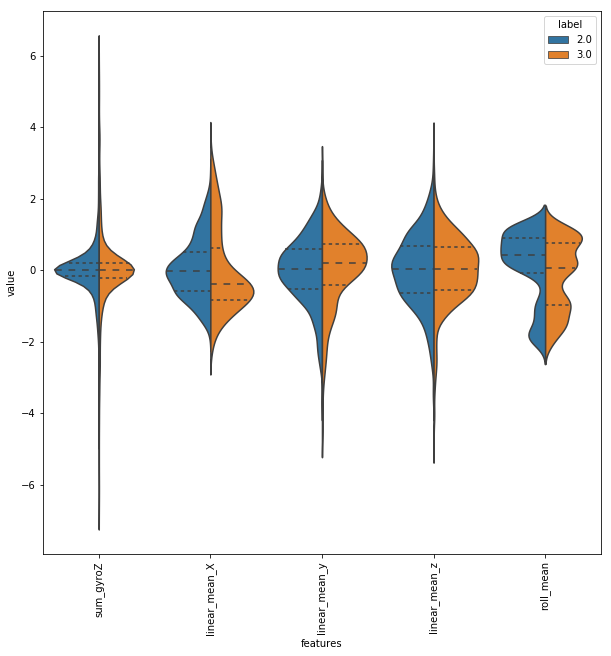

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df_entire.iloc[:, [5,6,7,8,9,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.violinplot(x="features", y="value", hue="label", data=test,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

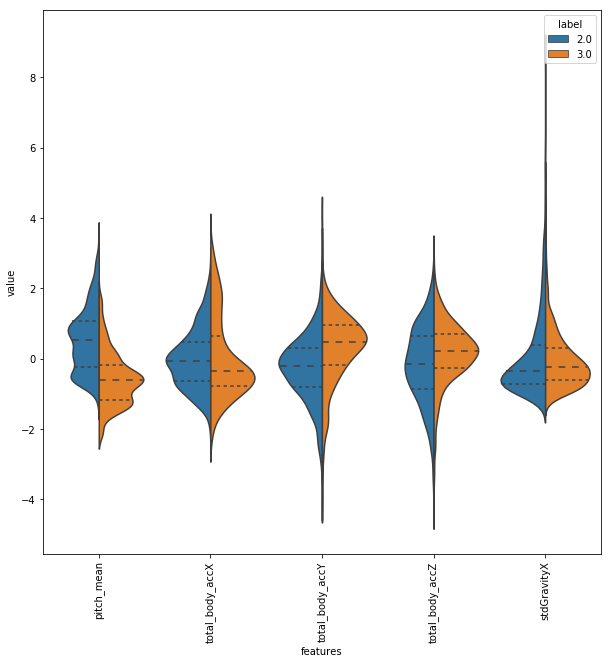

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df_entire.iloc[:, [10,11,12,13,14,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.violinplot(x="features", y="value", hue="label", data=test,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

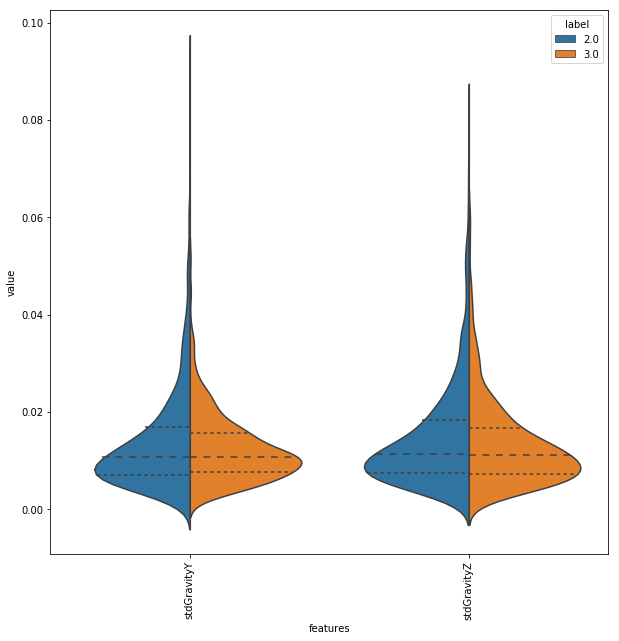

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df_entire.iloc[:, [15,16,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.violinplot(x="features", y="value", hue="label", data=test,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

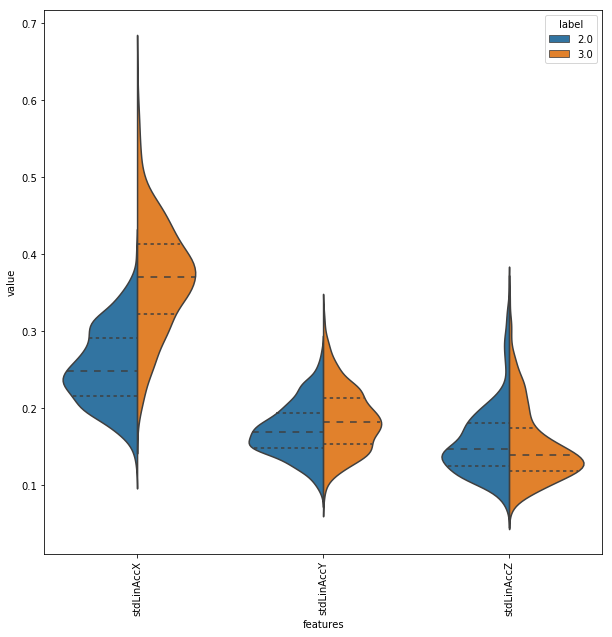

In [62]:
import seaborn as sns 
import matplotlib.pyplot as plt
import time
test = pd.melt(f_features_df_entire.iloc[:, [17,18,19,-1]],id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.violinplot(x="features", y="value", hue="label", data=test,split=True, inner="quart")
plt.xticks(rotation=90)

In [65]:
std_scaler = StandardScaler()
features_data_ft = std_scaler.fit_transform(features_data)

## LinearSVC

In [67]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
lsvc_clf = LinearSVC(loss='hinge', C=1.0)
random_indexs = np.random.permutation(accX.shape[0])
cross_val_score(lsvc_clf, features_data_ft[random_indexs,:], Y_train_s_l[random_indexs])

array([ 0.91266376,  0.90538574,  0.89781022])

In [71]:
# grid searching for params
params = [{"C":[0.1, 0.5, 1, 2, 5, 10, 20, 50]}]
lsvc_clf = LinearSVC(loss='hinge')
from sklearn.model_selection import GridSearchCV
gd_cv = GridSearchCV(lsvc_clf, params)
gd_cv.fit(features_data_ft[random_indexs,:], Y_train_s_l[random_indexs])
print(gd_cv.best_params_)
means = gd_cv.cv_results_['mean_test_score']
stds = gd_cv.cv_results_['std_test_score']
print(means)
print(stds)

{'C': 20}
[ 0.90675085  0.90626518  0.9057795   0.90675085  0.91063623  0.91063623
  0.91209325  0.90043711]
[ 0.00664179  0.00660512  0.00666238  0.00438272  0.00298087  0.00455067
  0.00310614  0.00350386]


## Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dec_clf = DecisionTreeClassifier()
random_indexs = np.random.permutation(accX.shape[0])
cross_val_score(dec_clf, features_data_ft[random_indexs,:], Y_train_s_l[random_indexs])

array([ 0.93886463,  0.95050946,  0.93576642])

## RandomForest Classifier

In [217]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_jobs=-1)
cross_val_score(rnd_clf, features_data_ft[random_indexs,:], Y_train_s_l[random_indexs])

array([ 0.94614265,  0.96069869,  0.95036496])

In [220]:
rnd_clf.fit(features_data_ft[random_indexs,:], Y_train_s_l[random_indexs])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## SVM Ploy

In [82]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='poly', degree=3, coef0=1, C=15.0)
cross_val_score(svc_clf, features_data_ft[random_indexs,:], Y_train_s_l[random_indexs])

array([ 0.97088792,  0.95924309,  0.96058394])

## SVM RBF

In [81]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='rbf', gamma = 1, C=20)
cross_val_score(svc_clf, features_data_ft[random_indexs,:], Y_train_s_l[random_indexs])

array([ 0.79184862,  0.77583697,  0.76642336])

## KNN StdScaler

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
vals = cross_val_score(knn_clf, features_data_ft[random_indexs,:], Y_train_s_l[random_indexs])
print(np.mean(vals))
print(np.std(vals))
print(vals)

0.936858657657
0.00455637355514
[ 0.93449782  0.94323144  0.93284672]


## KNN MinMaxScaler

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
vals = cross_val_score(knn_clf, MinMaxScaler().fit_transform(features_data[random_indexs,:]), Y_train_s_l[random_indexs])
print(np.mean(vals))
print(np.std(vals))
print(vals)

0.948520490018
0.00608392101958
[ 0.95487627  0.94032023  0.95036496]


## Logistic Regression

In [258]:
from sklearn.linear_model import LogisticRegression

In [259]:
loggr_clf = LogisticRegression()

In [260]:
cross_val_score(loggr_clf, features_data_ft[random_indexs,:], Y_train_s_l[random_indexs])

array([ 0.89082969,  0.91266376,  0.90072993])

In [261]:
loggr_clf.fit(features_data_ft[random_indexs,:], Y_train_s_l[random_indexs])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [262]:
y_predict = loggr_clf.predict(test_features_data_ft)
accuracy_score(y_predict, Y_test_s_l)

0.79797979797979801

## ExtraTree Classifier

In [263]:
from sklearn.ensemble import ExtraTreesClassifier
ext_classifier = ExtraTreesClassifier()
cross_val_score(ext_classifier, features_data_ft[random_indexs,:], Y_train_s_l[random_indexs])

array([ 0.95342067,  0.95778748,  0.97226277])

In [269]:
ext_classifier.fit(features_data_ft[random_indexs[:-500],:], Y_train_s_l[random_indexs[:-500]])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [270]:
y_predict = ext_classifier.predict(test_features_data_ft)
accuracy_score(y_predict, Y_test_s_l)

0.7991021324354658

In [271]:
y_predict = ext_classifier.predict(features_data_ft[random_indexs[-500:],:])
accuracy_score(y_predict, Y_train_s_l[random_indexs[-500:]])

0.97399999999999998

## Xgboost

In [144]:
from xgboost import XGBClassifier 

In [145]:
xgb_clf = XGBClassifier(n_estimators=20, learning_rate=0.7, objective='binary:logistic',silent=1, max_depth=1)

In [224]:
vals = cross_val_score(xgb_clf, features_data_ft[random_indexs,:], Y_train_s_l[random_indexs], cv=10)
print(np.mean(vals))
print(np.std(vals))
print(vals)

0.934912630511
0.0181402341643
[ 0.9178744   0.93719807  0.9468599   0.94660194  0.93203883  0.94660194
  0.92195122  0.90243902  0.92682927  0.97073171]


In [225]:
xgb_clf.fit(features_data_ft[random_indexs,:], Y_train_s_l[random_indexs])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.7, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1)

## Model Stacking

In [277]:
M_S_X_train = features_data_ft[random_indexs[:-1000],:]
M_S_y_train = Y_train_s_l[random_indexs[:-1000]]
M_S_X_test = features_data_ft[random_indexs[-1000:],:]
M_S_y_test = Y_train_s_l[random_indexs[-1000:]]

In [307]:
lsvc_clf = KNeighborsClassifier(n_neighbors=3)
svc_clf = SVC(kernel='poly', degree=2, coef0=1, C=15.0, probability=True)
ext_classifier = ExtraTreesClassifier()
rnd_clf = RandomForestClassifier(n_jobs=-1)

In [308]:
lsvc_clf.fit(M_S_X_train, M_S_y_train)
svc_clf.fit(M_S_X_train, M_S_y_train)
ext_classifier.fit(M_S_X_train, M_S_y_train)
rnd_clf.fit(M_S_X_train, M_S_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [310]:
y_predict_lsvc_clf = lsvc_clf.predict_proba(M_S_X_test)
y_predict_svc_clf = svc_clf.predict_proba(M_S_X_test)
y_predict_ext_classifier = ext_classifier.predict_proba(M_S_X_test)
y_predict_rnd_clf = rnd_clf.predict_proba(M_S_X_test)

In [311]:
blender_X = np.c_[y_predict_lsvc_clf,y_predict_svc_clf, y_predict_ext_classifier, y_predict_rnd_clf]
blender_y = M_S_y_test

In [312]:
xgb_clf = XGBClassifier(n_estimators=20, learning_rate=0.7, objective='binary:logistic',silent=1, max_depth=1)
print(cross_val_score(xgb_clf,blender_X,blender_y))
xgb_clf.fit(blender_X, blender_y)

[ 0.97904192  0.96096096  0.97597598]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.7, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1)

In [313]:
# ----------->>>> checking test accuracy
y_predict_lsvc_clf = lsvc_clf.predict_proba(test_features_data_ft)
y_predict_svc_clf = svc_clf.predict_proba(test_features_data_ft)
y_predict_ext_classifier = ext_classifier.predict_proba(test_features_data_ft)
y_predict_rnd_clf = rnd_clf.predict_proba(test_features_data_ft)
blender_X_test = np.c_[y_predict_lsvc_clf,y_predict_svc_clf, y_predict_ext_classifier, y_predict_rnd_clf]
blender_y_test = Y_test_s_l

In [314]:
y_predict = xgb_clf.predict(blender_X_test)
accuracy_score(y_predict, blender_y_test)

0.82154882154882158

## Loading Testing Data..

In [122]:
import numpy as np
test_accX = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt')
test_accY = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt')
test_accZ = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt')
test_linearX = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt')
test_linearY = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt')
test_linearZ = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt')
test_gravityX = test_accX - test_linearX
test_gravityY = test_accY - test_linearY
test_gravityZ = test_accZ - test_linearZ

In [123]:
test_gyroX = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt')
test_gyroY = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt')
test_gyroZ = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt')

In [124]:
Y_test = np.loadtxt('./UCI HAR Dataset/UCI HAR Dataset/test/Y_test.txt')
test_sitting_index = np.argwhere(Y_test == 2)
test_standing_index = np.argwhere(Y_test == 3)
t_s_l_i = np.vstack((test_sitting_index, test_standing_index))[:,0]

In [125]:
test_accX = test_accX[t_s_l_i,:]
test_accY = test_accY[t_s_l_i,:]
test_accZ = test_accZ[t_s_l_i, :]
test_linearX = test_linearX[t_s_l_i, :]
test_linearY = test_linearY[t_s_l_i, :]
test_linearZ = test_linearZ[t_s_l_i, :]
test_gravityX = test_gravityX[t_s_l_i, :]
test_gravityZ = test_gravityZ[t_s_l_i, :]
test_gravityY = test_gravityY[t_s_l_i, :]

In [126]:
Y_test_s_l = Y_test[t_s_l_i]

In [128]:
import math
def roll_pitch(accX, accY, accZ):
    roll = []
    pitch = []
    for i in range(accX.shape[0]):
        roll.append(math.degrees(math.atan(accY[i]/accZ[i])))
        pitch.append(math.degrees(math.atan((- accX[i]) / (math.sqrt(accY[i] * accY[i] + accZ[i] * accZ[i])))))
    return np.mean(roll), np.mean(pitch)

num_features = 20
test_features_data = np.zeros(shape=(test_linearY.shape[0],num_features))
for i in range(test_gravityX.shape[0]):
    m_gx = np.mean(test_gravityX[i,:])
    m_gy = np.mean(test_gravityY[i,:])
    m_gz = np.mean(test_gravityZ[i,:])
    s_gy_x = np.sum(test_gyroX[i,:])
    s_gy_y = np.sum(test_gyroY[i,:])
    s_gy_z = np.sum(test_gyroZ[i,:])
    m_lx = np.mean(test_linearX[i,0])
    m_ly = np.mean(test_linearY[i,0])
    m_lz = np.mean(test_linearZ[i,0])
    roll_mean, pitch_mean = roll_pitch(test_gravityX[i,:], test_gravityY[i,:], test_gravityZ[i,:])
    m_t_ax = np.mean(test_accX[i,0])
    m_t_ay = np.mean(test_accY[i,0])
    m_t_az = np.mean(test_accZ[i,0])
    std_gx = np.std(test_gravityX[i,:])
    std_gy = np.std(test_gravityY[i,:])
    std_gz = np.std(test_gravityZ[i,:])
    std_lx = np.std(test_linearX[i,:])
    std_ly = np.std(test_linearY[i,:])
    std_lz = np.std(test_linearZ[i,:])
    test_features_data[i,:] = [m_gx, m_gy, m_gz,s_gy_x, s_gy_y, s_gy_z, m_lx, m_ly, m_lz, roll_mean, pitch_mean, m_t_ax, m_t_ay, m_t_az,
                          std_gx,std_gy,std_gz, std_lx, std_ly, std_lz]

In [148]:
from sklearn.metrics import accuracy_score

In [257]:
test_features_data_ft = std_scaler.transform(test_features_data)
y_predict = xgb_clf.predict(test_features_data_ft)
accuracy_score(y_predict, Y_test_s_l)

NotFittedError: Must fit neighbors before querying.

In [227]:
importance = (xgb_clf.feature_importances_ * 100)
features = features_df.columns
sorted(zip(importance, features), key=lambda x: x[0], reverse=True)[0:10]

[(30.000002, 'stdLinAccX'),
 (20.0, 'mean_gravityY'),
 (15.000001, 'pitch_mean'),
 (10.0, 'mean_gravityZ'),
 (10.0, 'roll_mean'),
 (10.0, 'stdGravityY'),
 (5.0, 'stdLinAccZ'),
 (0.0, 'mean_gravityX'),
 (0.0, 'sum_gyroX'),
 (0.0, 'sum_gyroY')]

In [221]:
importance = np.array(rnd_clf.feature_importances_)*100
features = features_df.columns
sorted(zip(importance, features), key=lambda x: x[0], reverse=True)[0:10]

[(36.860364994177601, 'stdLinAccX'),
 (12.875804536643843, 'mean_gravityY'),
 (11.20653878357858, 'pitch_mean'),
 (5.8658756276344146, 'mean_gravityZ'),
 (5.5000193159291983, 'mean_gravityX'),
 (4.1747635053055658, 'roll_mean'),
 (3.2574450059090854, 'total_body_accZ'),
 (2.6587570791144786, 'stdLinAccY'),
 (2.5726205871029215, 'total_body_accX'),
 (1.9519782901274687, 'stdGravityY')]

In [253]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
def plot_decision_boundary(clf, X, x_i, y_i, labels):
    import matplotlib.pyplot as ax
    X0, X1 = X[:, x_i], X[:, y_i]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.Spectral, alpha=0.8)
    #ax.scatter(X0, X1, c=labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    #ax.set_xlim(xx.min(), xx.max())
    #ax.set_ylim(yy.min(), yy.max())
    ax.xlabel('Sepal length')
    ax.ylabel('Sepal width')
    ax.xticks(())
    ax.yticks(())
    ax.title("decision Bounday ")

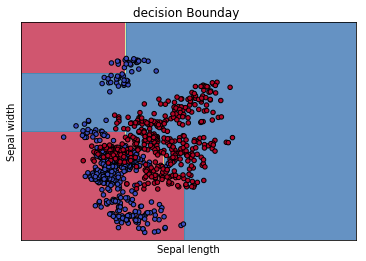

In [255]:
xgb_clf.fit(features_data_ft[:,[17,1]], Y_train_s_l)
plot_decision_boundary(xgb_clf, features_data_ft, 17, 1, Y_train_s_l)
plt.scatter(test_features_data_ft[:,17], test_features_data_ft[:,1],c=Y_test_s_l, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

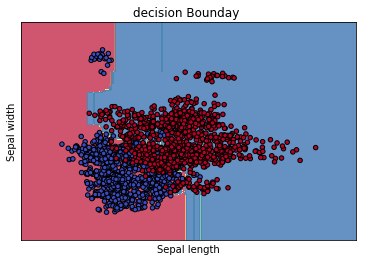

In [250]:
rnd_clf.fit(features_data_ft[:,[17,1]], Y_train_s_l)
plot_decision_boundary(rnd_clf, features_data_ft, 17, 1, Y_train_s_l)

## Try different thing

In [195]:
random1 = np.random.permutation(np.arange(1000)).reshape((-1,1))
random2 = np.random.permutation(np.arange(1000)).reshape((-1,1))
X = np.hstack((random1, random2))
y = (random1 > random2)
y = y[:,0]

In [201]:
random1 = np.random.permutation(np.arange(2500,2800)).reshape((-1,1))
random2 = np.random.permutation(np.arange(2500,2800)).reshape((-1,1))
X_test = np.hstack((random1, random2))
y_test = (random1 > random2)
y_test = y_test[:,0]

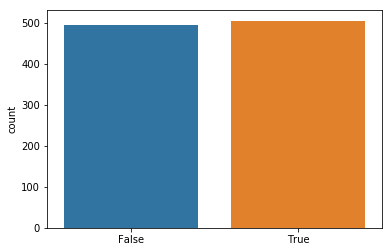

In [202]:
sns.countplot(y) 

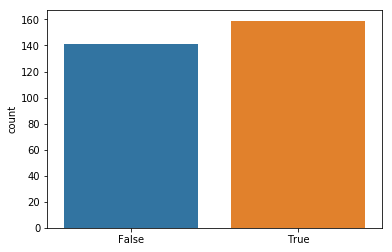

In [203]:
sns.countplot(y_test)

In [204]:
## Linear SVC
lin_clf = LinearSVC(loss='hinge', C=10.0)
lin_clf.fit(X,y)
from sklearn.metrics import accuracy_score
y_predict = lin_clf.predict(X_test)
accuracy_score(y_predict, y_test)

0.97666666666666668

In [205]:
rndm_clf = RandomForestClassifier()
print(cross_val_score(rndm_clf, X, y))
## RandomForest Classifier
rndm_clf = RandomForestClassifier()
rndm_clf.fit(X,y)
from sklearn.metrics import accuracy_score
y_predict = rndm_clf.predict(X_test)
accuracy_score(y_predict, y_test)

[ 0.97005988  0.96996997  0.97597598]


0.46999999999999997

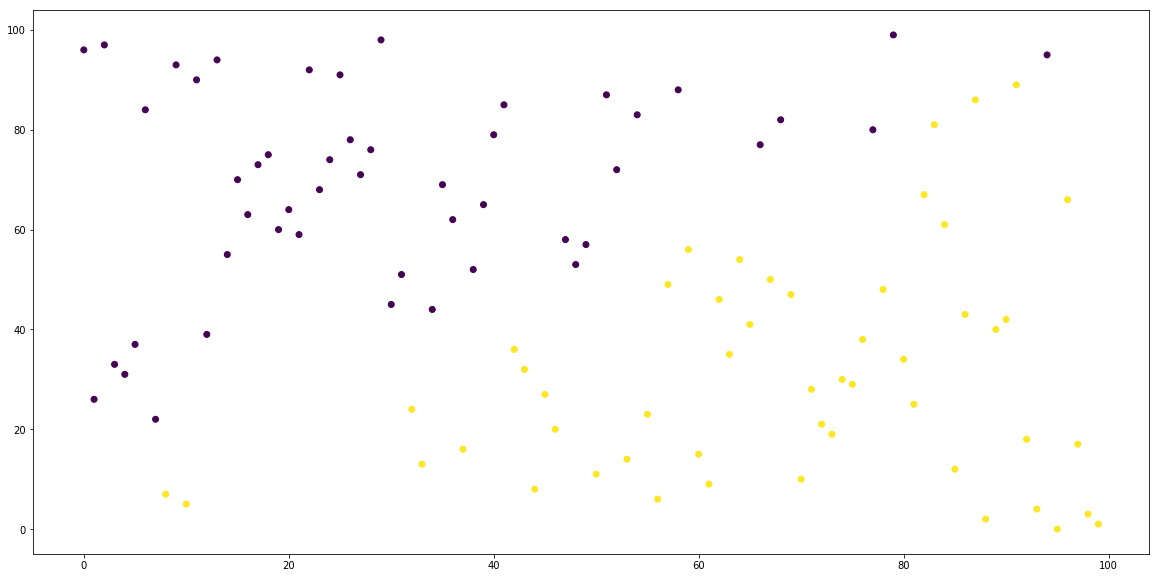

In [181]:
 import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(X[:,0], X[:,1], c=y)

In [182]:
rndm_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)